In [3]:
import pandas as pd

In [4]:
file = 'exp1.xlsx'

df = pd.read_excel(file, sheet_name = 'all')

In [5]:
df_long = df.melt(
    id_vars=['Item', 'Condition', 'NPI', 'Structure', 'Mood', 'Sentence', 'Tense'],
    value_vars=['gemini', 'qwen', 'llama', 'mistral', 'moonlight',
                'gemma', 'deephermes', 'ds_distill_llama'],
    var_name='Model',
    value_name='Rating'
)

In [ ]:
df_long.head()

,Item,Condition,NPI,Structure,Mood,Sentence,Tense,Model,Rating
0,1,1,yes,Conditional,Indicative,If the students have been all that attentive d...,Present Perfect + Future,gemini,4
1,1,2,yes,Conditional,Subjunctive,If the students had been all that attentive du...,Past Perfect + Past conditional,gemini,4
2,1,3,no,Conditional,Indicative,If the students have been attentive during cla...,Present Perfect + Future,gemini,6
3,1,4,no,Conditional,Subjunctive,If the students had been attentive during clas...,Past Perfect + Past conditional,gemini,6
4,1,5,yes,Universal Q,Indicative,All students who have been all that attentive ...,Present Perfect + Future,gemini,3


In [ ]:
df_long.groupby(['Condition'])['Rating'].mean()

,Rating
Condition,
1,3.838542
2,4.989583
3,5.593750
4,5.817708
5,3.692708
6,5.432292


In [ ]:
df_long.groupby(['Condition'])['Rating'].std()

,Rating
Condition,
1,1.700007
2,1.269825
3,0.955317
4,1.377873
5,1.177605
6,1.803313


In [ ]:
df_long.groupby(['Model'])['Rating'].std().mean()

1.477961004916469

In [ ]:
df_long.groupby(['Item'])['Rating'].std().mean()

1.635191280955736

<ipython-input-7-27af00cc2a28>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-7-27af00cc2a28>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


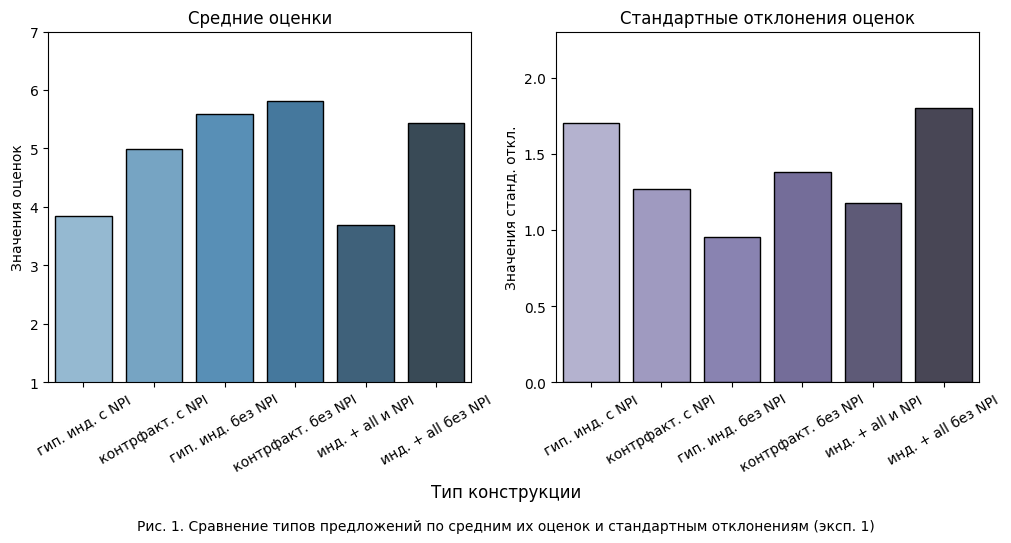

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

summary = df_long.groupby('Condition')['Rating'].agg(['mean', 'std']).reset_index()

condition_labels = {
    1: 'гип. инд. с NPI',
    2: 'контрфакт. с NPI',
    3: 'гип. инд. без NPI',
    4: 'контрфакт. без NPI',
    5: 'инд. + all и NPI',
    6: 'инд. + all без NPI'
}

summary['Condition_label'] = summary['Condition'].map(condition_labels)

fig, axs = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)

# график средних
sns.barplot(
    data=summary,
    x='Condition_label',
    y='mean',
    palette='Blues_d',
    edgecolor='black',
    ax=axs[0]
)
axs[0].set_title('Средние оценки')
axs[0].tick_params(axis='x', rotation=30)
axs[0].set_ylim(1, 7)

# график стандартных отклонений
sns.barplot(
    data=summary,
    x='Condition_label',
    y='std',
    palette='Purples_d',
    edgecolor='black',
    ax=axs[1]
)
axs[1].set_title('Стандартные отклонения оценок')
axs[1].tick_params(axis='x', rotation=30)
axs[1].set_ylim(0, summary['std'].max() + 0.5)
fig.supxlabel('Тип конструкции', fontsize=12)

axs[0].set_xlabel('')
axs[0].set_ylabel('Значения оценок')
axs[1].set_xlabel('')
axs[1].set_ylabel('Значения станд. откл.')

fig.text(0.5, -0.05, 'Рис. 1. Сравнение типов предложений по средним их оценок и стандартным отклонениям (эксп. 1)',
         ha='center', fontsize=10)

plt.show()

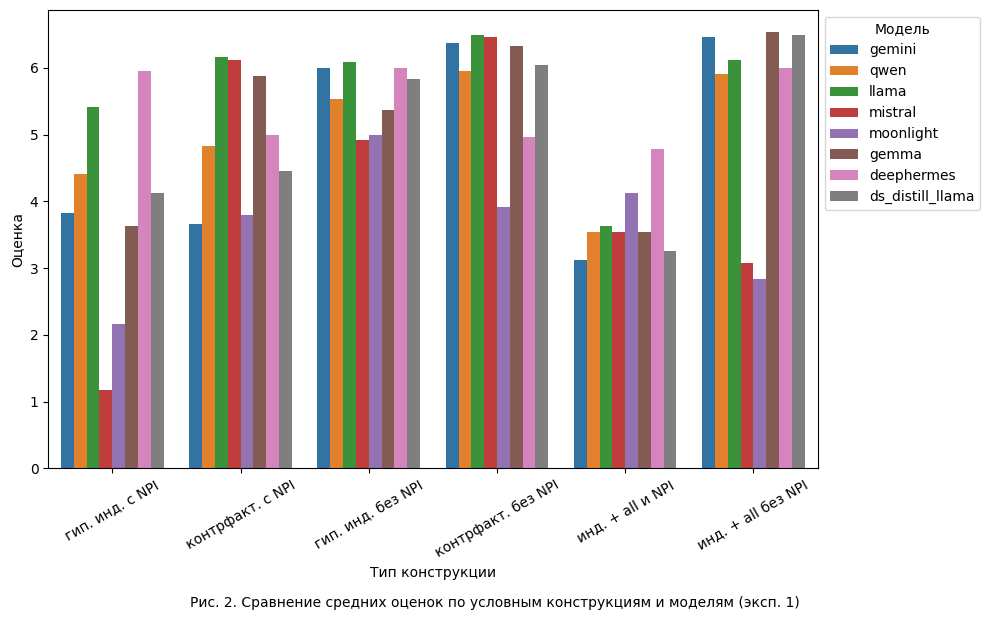

In [8]:
df_copy = df_long.copy()
df_copy['Condition_label'] = df_copy['Condition'].map(condition_labels)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_copy,
    x='Condition_label',
    y='Rating',
    hue='Model',
    errorbar=None
)

plt.xlabel('Тип конструкции')
plt.ylabel('Оценка')
plt.xticks(rotation=30)
plt.legend(title='Модель', bbox_to_anchor=(1, 1), loc='upper left')
plt.gcf().text(0.5, -0.02, 'Рис. 2. Сравнение средних оценок по условным конструкциям и моделям (эксп. 1)',
         ha='center', fontsize=10)
plt.tight_layout()
plt.show()

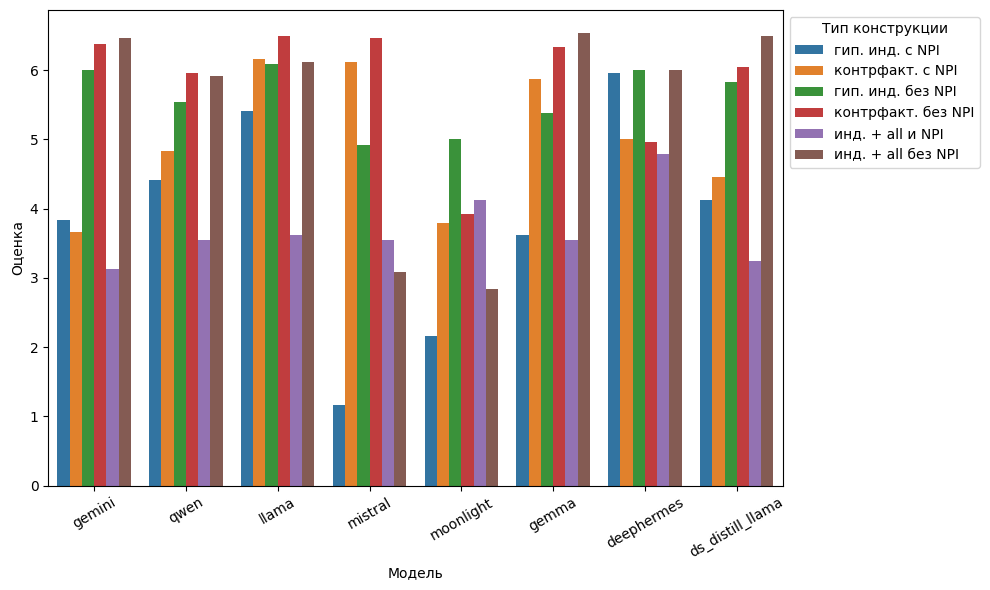

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_copy,
    x='Model',
    y='Rating',
    hue='Condition_label',
    errorbar=None
)

plt.xlabel('Модель')
plt.ylabel('Оценка')
plt.xticks(rotation=30)
plt.legend(title='Тип конструкции', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# деление на датасеты, которые будут подаваться байесовским моделям
df_if_sentences = df_long[df_long['Structure'] == 'Conditional']
df_if_quant_sentences = df_long[df_long['Mood'] == 'Indicative']

In [ ]:
df_if_sentences.to_excel('df_if_sentences_API_VER.xlsx', index=False)
df_if_quant_sentences.to_excel('df_if_quant_sentences_API_VER.xlsx', index=False)